<a href="https://colab.research.google.com/github/muhammadarif321/bebas/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library(s)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data Dictionary

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/DigitalSkola/dataset HC'
data_cols = pd.read_csv(path+"/HomeCredit_columns_description.csv", encoding='unicode_escape')

# Load Dataset

In [ ]:
dataset = pd.read_csv(path+"/application_train.csv")
pd.set_option('display.max_columns', None)
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# cols_num = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', '']

cols_num_only = dataset.select_dtypes(include=np.number).columns.tolist()
cols_num_only.pop(0)
cols_cat_only = dataset.columns[~dataset.columns.isin(cols_num_only)]

In [ ]:
pd.set_option('display.max_colwidth', 1000)
# data_cols\
#     # .loc[(data_cols.Table == 'application_{train|test}.csv') 
#     #           &(data_cols.Row.isin(['NAME_TYPE_SUITE','DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']))] \
#     #           .drop("Unnamed: 0",axis=1 )

data_cols.loc[(data_cols.Table == 'application_{train|test}.csv')]


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application),NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application),NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application),NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application),NaN


# Data Understanding Notes


Last understanding
- Table: Application Train
- Column: DONE
- Time: 07/03/2021 21:47


## Notes


1. DAYS_BIRTH = birth date - date of accepted loan
2. DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH = date of accepted loan - date of column context (read data dictionary)

# Identify which activity should be done

by understanding each column means, knowing what each row means and also checking for null and duplicate values

## Copy Main Dataset

In [ ]:
pd.set_option('display.max_rows', None)
# copy data
dataset_cp = dataset.copy()

## Check null

In [ ]:
# contain null values
cols_null = pd.DataFrame(dataset_cp.isnull().sum())
cols_null = cols_null.reset_index().rename(columns={'index': 'Title', 0: 'Total'})
cols_null.loc[:, 'Percentage'] = cols_null.apply(lambda row: row['Total']/dataset_cp.shape[0] * 100, axis=1)
cols_null[cols_null['Percentage'] > 55]
# cols_null.loc[cols_null['Total'] > 0].count()['Title']

,Title,Total,Percentage
21,OWN_CAR_AGE,202929,65.990810
41,EXT_SOURCE_1,173378,56.381073
45,BASEMENTAREA_AVG,179943,58.515956
47,YEARS_BUILD_AVG,204488,66.497784
48,COMMONAREA_AVG,214865,69.872297
52,FLOORSMIN_AVG,208642,67.848630
53,LANDAREA_AVG,182590,59.376738
54,LIVINGAPARTMENTS_AVG,210199,68.354953
56,NONLIVINGAPARTMENTS_AVG,213514,69.432963
57,NONLIVINGAREA_AVG,169682,55.179164


## Check duplicated row

In [ ]:
dataset_cp.duplicated().sum()

0

## Notes

1. Analyze whether to replace or drop null values

# Analyze Data (use statistics and EDA)

Data distribution each column, interaction between one to another data, visualize, **get insight of data**

## Question to be analyzed

1. Apakah ada perbedaan distribusi penghasilan dari orang yg gagal/sukses bayar?
2. Bagaimana korelasi antar data numerik?
3. Apakah orang yg gagal bayar karena cicilan per tahunnya terlalu besar?
4. Apakah orang yang gagal bayar karena belum bekerja?
5. Bagaimana korelasi antara orang yang gagal/sukses bayar dengan penghasilannya per tahun?
6. Apakah orang yang gagal bayar terdapat orang-orang di lingkungannya yang memiliki pinjaman aktif?
7. Apakah orang yang gagal bayar terdapat orang-orang di lingkungannya yang gagal bayar juga?
8. Tipe kontrak apa yang paling banyak gagal/sukses bayar?
9. Apakah korelasi antara status pernikahan dengan gagal/sukses bayar pinjaman?
10. Bagaimana korelasi antara orang yang gagal/sukses bayar dengan pengisian kontak personal?
11. Apakah rating wilayah provinsi maupun kota mempengaruhi gagal/sukses bayar?
12. Berapa rata-rata, dan median orang yang gagal/sukses bayar?
13. Berapa rata-rata dan median lama orang yang gagal/sukses bayar bekerja?
14. Bagaimana persebaran jenis pekerjaan klien tiap pinjaman?
15. Bagaimana korelasi antara penilaian ext_source dengan gagal/sukses bayarnya suatu pinjaman?
16. Bagaimana persebaran tipe organisasi tiap pinjaman?
17. apakah tipe organisasi berkorelasi dengan sukses/gagalnya pembayaran?

## Descriptive Analysis

In [ ]:
dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 1. Apakah ada perbedaan distribusi penghasilan dari orang yg gagal/sukses bayar?

In [ ]:
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Persebaran penghasilan klien tiap pinjaman baik yang sukses maupun gagal bayar

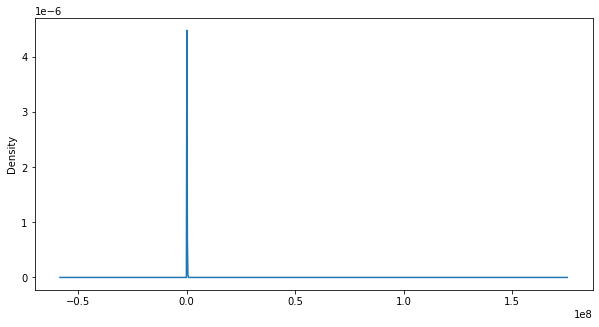

In [ ]:
plt.figure(figsize=(10,5))
dataset['AMT_INCOME_TOTAL'].plot.density()
plt.show()

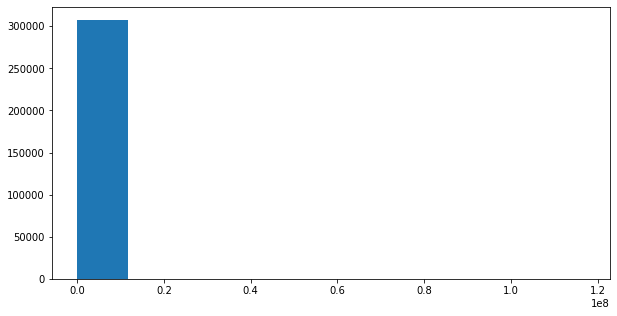

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(dataset['AMT_INCOME_TOTAL'])
plt.show()

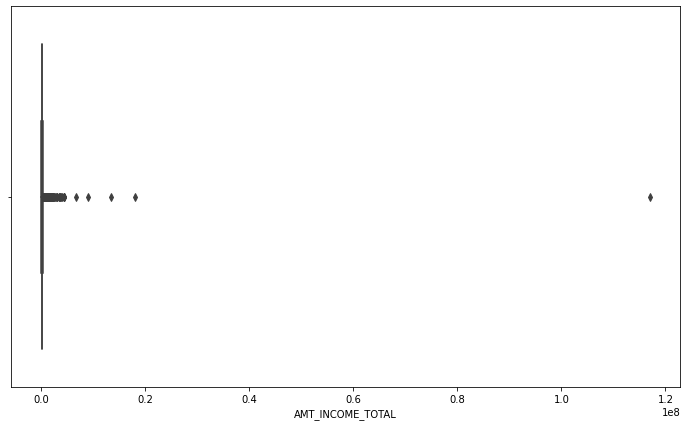

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=dataset, x="AMT_INCOME_TOTAL")
plt.show()

#### Remove outliers untuk semua penghasilan klien tiap pinjaman yang sukses maupun gagal bayar

In [ ]:
q1 = np.quantile(dataset['AMT_INCOME_TOTAL'], 0.25, axis=0)
q3 = np.quantile(dataset['AMT_INCOME_TOTAL'], 0.75, axis=0)
# interquartile
iqr = (q3 - q1) * 1.5
#lower
lower = q1 - iqr
#upper
upper = q3 + iqr
print(lower)
print(upper)

-22500.0
337500.0


In [ ]:
df_income_all = dataset.loc[(dataset['AMT_INCOME_TOTAL'] < upper) & (dataset['AMT_INCOME_TOTAL'] > lower)]

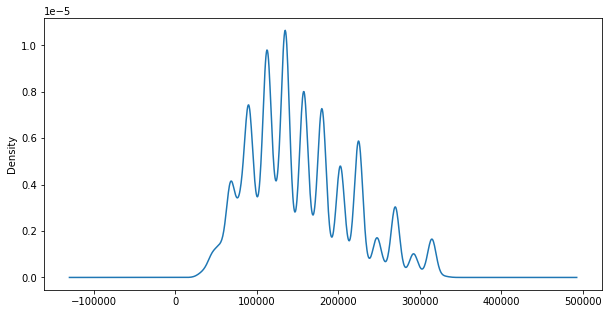

In [ ]:
plt.figure(figsize=(10,5))
clean_income = df_income_all['AMT_INCOME_TOTAL']
clean_income.plot.density()
plt.show()

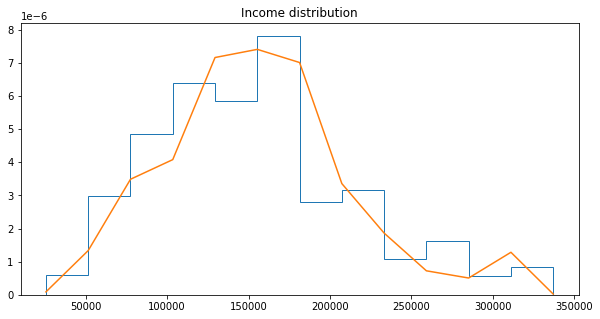

In [ ]:
plt.figure(figsize=(10,5))
clean_income = df_income_all['AMT_INCOME_TOTAL']
plt.title("Income distribution")
# plt.hist(clean_income, bins=14)
# plt.show()

density = stats.gaussian_kde(clean_income)
n, x, _ = plt.hist(clean_income, bins=12, 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.show()

In [ ]:
print("skewness :", df_income_all['AMT_INCOME_TOTAL'].skew())
print("kurtosis :", df_income_all['AMT_INCOME_TOTAL'].kurt())

skewness : 0.6023703248383754
kurtosis : -0.20017948262460283


#### Result

Berdasarkan chart beserta nilai skewness dan kurtosis dan disimpulkan bahwa 
1. penghasilan klien hampir terdistribusi normal
0. Data penghasilan tersebar secara merata (kurtosis platykurtic)

#### Persebaran penghasilan klien tiap pinjaman yang gagal bayar

In [ ]:
df_default = dataset.loc[dataset['TARGET'] == 1]
q1 = np.quantile(df_default['AMT_INCOME_TOTAL'], 0.25, axis=0)
q3 = np.quantile(df_default['AMT_INCOME_TOTAL'], 0.75, axis=0)
# interquartile
iqr = (q3 - q1) * 1.5
#lower
lower = q1 - iqr
#upper
upper = q3 + iqr
print(lower)
print(upper)

clean_income_def = df_default.loc[(df_default['AMT_INCOME_TOTAL'] < upper) & (df_default['AMT_INCOME_TOTAL'] > lower), 'AMT_INCOME_TOTAL']

-22500.0
337500.0


#### Persebaran penghasilan klien tiap pinjaman yang sukses bayar

In [ ]:
df_success = dataset.loc[dataset['TARGET'] == 0]
q1 = np.quantile(df_default['AMT_INCOME_TOTAL'], 0.25, axis=0)
q3 = np.quantile(df_default['AMT_INCOME_TOTAL'], 0.75, axis=0)
# interquartile
iqr = (q3 - q1) * 1.5
#lower
lower = q1 - iqr
#upper
upper = q3 + iqr
print(lower)
print(upper)

clean_income_suc = df_success.loc[(df_success['AMT_INCOME_TOTAL'] < upper) & (df_success['AMT_INCOME_TOTAL'] > lower), 'AMT_INCOME_TOTAL']

-22500.0
337500.0


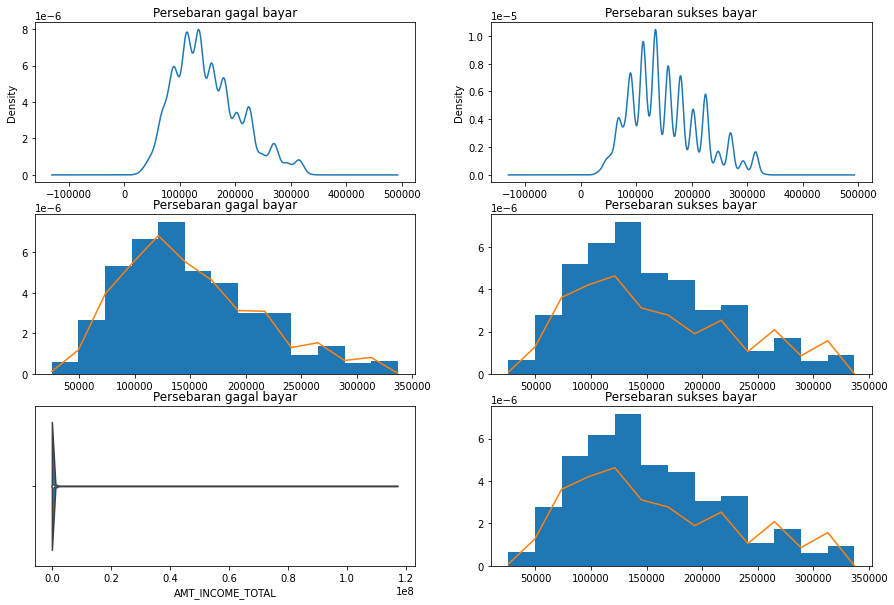

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
plt.title('Persebaran gagal bayar')
clean_income_def.plot.density()
plt.subplot(3, 2, 2)
plt.title('Persebaran sukses bayar')
clean_income_suc.plot.density()
plt.subplot(3, 2, 3)
plt.title('Persebaran gagal bayar')
density = stats.gaussian_kde(clean_income_def)
n, x, _ = plt.hist(clean_income_def, bins=13, 
                   histtype=u'stepfilled', density=True)  
plt.plot(x, density(x))
plt.subplot(3, 2, 4)
plt.title('Persebaran sukses bayar')
density = stats.gaussian_kde(clean_income_suc)
n, x, _ = plt.hist(clean_income_suc, bins=13, 
                   histtype=u'stepfilled', density=True)  
plt.plot(x, density(x))
plt.subplot(3, 2, 5)
plt.title('Persebaran gagal bayar')
sns.violinplot(data=df_default, x='AMT_INCOME_TOTAL')
plt.subplot(3, 2, 6)
plt.title('Persebaran sukses bayar')
density = stats.gaussian_kde(clean_income_suc)
n, x, _ = plt.hist(clean_income_suc, bins=13, 
                   histtype=u'stepfilled', density=True)  
plt.plot(x, density(x))

plt.show()

In [ ]:
print("skewness gagal bayar:", df_default['AMT_INCOME_TOTAL'].skew())
print("kurtosis gagal bayar:", df_default['AMT_INCOME_TOTAL'].kurt())
print('')
print("skewness sukses bayar:", df_success['AMT_INCOME_TOTAL'].skew())
print("kurtosis sukses bayar:", df_success['AMT_INCOME_TOTAL'].kurt())

skewness gagal bayar: 154.34682390301842
kurtosis gagal bayar: 24150.787822452276

skewness sukses bayar: 27.825662699955586
kurtosis sukses bayar: 3419.565661659891


#### Mean dan median penghasilan sukses dan gagal

In [ ]:
pd.pivot_table(dataset, index = ['TARGET'], 
               values=['AMT_INCOME_TOTAL'], 
               aggfunc={'AMT_INCOME_TOTAL': [np.mean, np.median, pd.Series.mode]})

AMT_INCOME_TOTAL                    
                   mean    median      mode
TARGET                                     
0         169077.722266  148500.0  135000.0
1         165611.760906  135000.0  135000.0

#### Result

Berdasarkan chart beserta nilai skewness dan kurtosis dan disimpulkan bahwa 
1. Kemiringan dari persebaran penghasilan klien positif
2. Persebarannya tidak merata
3. Rata-rata penghasilan klien yang gagal bayar yaitu 165.611,761; dan mediannya yaitu 135.000
4. Rata-rata penghasilan klien yang sukses bayar yaitu 169.077,722 dan mediannya yaitu 148.500

### Bagaimana korelasi antar data numerik?

In [ ]:
data_corr = dataset[cols_num_only].corr(method="spearman")

sns.heatmap(data_corr, annot=True)
plt.show()

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
# dataset.describe()
pd.pivot_table(dataset, index = ['NAME_CONTRACT_TYPE','CODE_GENDER'], 
               values=['AMT_INCOME_TOTAL','AMT_CREDIT'], 
               aggfunc={'AMT_INCOME_TOTAL': [np.sum, np.mean, np.median, 'count'], 'AMT_CREDIT': [np.sum, np.mean, np.median, 'count']})


- From that table we see that most client chose cash loans

### Total loans each contract type (bar chart)

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=dataset, x='NAME_CONTRACT_TYPE')
ax.set_xlabel("Contract Types")
ax.set_ylabel("Count Loans")
plt.title("How many loans each contract type")
for p in ax.patches:
    ax.annotate('{:,} loans'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+2000))

plt.show()

In [ ]:
dataset.groupby('TARGET').count()['SK_ID_CURR']

In [ ]:
plt.bar(dataset.groupby('TARGET').count()['SK_ID_CURR'].index, dataset.groupby('TARGET').count()['SK_ID_CURR'])
plt.show()

# Pre-processing

# Develop Model

# Main Note

## Notes

1. Understand dataset - Understanding the data
2. Identify which activity shoud be done - Understand each column, check if there is missing values or duplicate values, know what does each row mean?
3. Analyze (use statistics and EDA) - Data distribution each column, interaction between one to another data, visualize, **get insight of data**
4. Pre-processing


## Question to ask 

### About columns

1. AMT_INCOME_TOTAL per month? - Per Year
2. AMT_ANNUITY, what does this column mean is the number of installments that have been paid for the loan in that row? - Yes
3. What are these? (OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE) - Observable or defaulted social surrounding with active or defaulted loan
4. What application means in this context? (Ex: on column DAYS_LAST_PHONE_CHANGE) - Apply loan
5. What/Who is Credit Bureau? - Company or Organization that sell or provide data of loan records

### About data

1. How to see if column is important?
2. Takout columns? (more analysis needed):
    - APARTMENTS_AVG
    - BASEMENTAREA_AVG
    - YEARS_BEGINEXPLUATATION_AVG
    - YEARS_BUILD_AVG
    - COMMONAREA_AVG
    - ELEVATORS_AVG
    - ENTRANCES_AVG
    - FLOORSMAX_AVG
    - FLOORSMIN_AVG
    - LANDAREA_AVG	
    - LIVINGAPARTMENTS_AVG	
    - LIVINGAREA_AVG	
    - NONLIVINGAPARTMENTS_AVG
    - NONLIVINGAREA_AVG	
    - APARTMENTS_MODE	
    - BASEMENTAREA_MODE
    - YEARS_BEGINEXPLUATATION_MODE	
    - YEARS_BUILD_MODE
    - COMMONAREA_MODE
    - ELEVATORS_MODE
    - ENTRANCES_MODE
    - FLOORSMAX_MODE
    - FLOORSMIN_MODE
    - LANDAREA_MODE
    - LIVINGAPARTMENTS_MODE	
    - LIVINGAREA_MODE
    - NONLIVINGAPARTMENTS_MODE
    - NONLIVINGAREA_MODE
    - APARTMENTS_MEDI
    - BASEMENTAREA_MEDI
    - YEARS_BEGINEXPLUATATION_MEDI	
    - YEARS_BUILD_MEDI	
    - COMMONAREA_MEDI	
    - ELEVATORS_MEDI	
    - ENTRANCES_MEDI	
    - FLOORSMAX_MEDI	
    - FLOORSMIN_MEDI	
    - LANDAREA_MEDI	
    - LIVINGAPARTMENTS_MEDI	
    - LIVINGAREA_MEDI	
    - NONLIVINGAPARTMENTS_MEDI	
    - NONLIVINGAREA_MEDI
    - FONDKAPREMONT_MODE
    - TOTALAREA_MODE
    - WALLSMATERIAL_MODE	
    - EMERGENCYSTATE_MODE

## **To Do**

1. **Check video explaination about final project**
2. **Read statistical material**